# YZV 211E 

In this assignment, you'll dive into the Olympic medalists dataset, using different visualization techniques to uncover patterns and connections. Each question invites you to choose the right visualization method, pushing you to think critically about representing complex data effectively. The aim is to deepen your understanding of data visualization principles and inspire creative, insightful interpretations of the dataset. 

* If you need you can implement data cleaning/preparation steps before data visualization.

* Do not use the same visualization method for each question, try to choose different techniques among the most appropriate ones.
,
* If any data processing steps are required before visualization, solve these problems as efficiently as possible with pandas. Avoid using unnecessary loops.
  
* Don't forget to leave comments in the notebook. Print the necessary outputs at each stage in your code. Assignments without necessary outputs and comments will be deducted points.
  
* Since this is a visualization assignment, in addition to giving the correct answer, you will also be evaluated on visual details (titles, naming, legend, etc.)

**Important:**
* **Run the notebooks before the submission.**

In [1]:
# You can use the following libraries if you need them.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset:** Download the dataset from [here](https://github.com/kalilurrahman/dataset/blob/main/Summer-Olympic-medals-1976-to-2008.csv). This dataset is a list of all the medal winners in the Summer Olympics from 1976 Montreal to 2008 Beijing. It includes each and every medal awarded within the period.

### Q1 Temporal Analysis of Medal Wins (20 points):
* Explore the temporal patterns of medal wins for top 10 country wity the highest number of medals. Choose an appropriate visualization method to illustrate how the selected countries' medal counts have changed over time.
* Use pandas functions for data preparation and try to avoid the usage of unnecessary loops.
* Discuss any patterns you observe.

**Your Answer:** 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
som_table = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding='ISO-8859-1')
# Display the DataFrame to understand its structure
print(som_table,'\n')

# Is there any missing values?
print (som_table.isnull().values.any(),'\n')
# Total number of missing values for each column:
print(som_table.isnull().sum(),'\n')
#The total count of missing values:
print (som_table.isnull().sum().sum(),'\n')

# Delete missing values
cleaned_som_table = som_table.dropna()
# Checking it is cleaned
print(cleaned_som_table.isnull().values.any())

           City    Year      Sport       Discipline           Event  \
0      Montreal  1976.0   Aquatics           Diving  3m springboard   
1      Montreal  1976.0   Aquatics           Diving  3m springboard   
2      Montreal  1976.0   Aquatics           Diving  3m springboard   
3      Montreal  1976.0   Aquatics           Diving  3m springboard   
4      Montreal  1976.0   Aquatics           Diving    10m platform   
...         ...     ...        ...              ...             ...   
15428   Beijing  2008.0  Wrestling  Wrestling Gre-R       66 - 74kg   
15429   Beijing  2008.0  Wrestling  Wrestling Gre-R       66 - 74kg   
15430   Beijing  2008.0  Wrestling  Wrestling Gre-R       55 - 60kg   
15431   Beijing  2008.0  Wrestling  Wrestling Gre-R       60 - 66kg   
15432   Beijing  2008.0  Wrestling  Wrestling Gre-R      96 - 120kg   

                        Athlete Gender Country_Code        Country  \
0               KÖHLER, Christa  Women          GDR   East Germany   
1      

In [3]:
# #  Data Preparation
medals_df = cleaned_som_table[['Country', 'Medal','Year']]
# Count the number of medals for each country
grouped_df = medals_df.groupby('Country').count()
top_ten = grouped_df.sort_values(by = ['Medal'],ascending=False)

print(top_ten['Medal'].head(10))

Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Name: Medal, dtype: int64


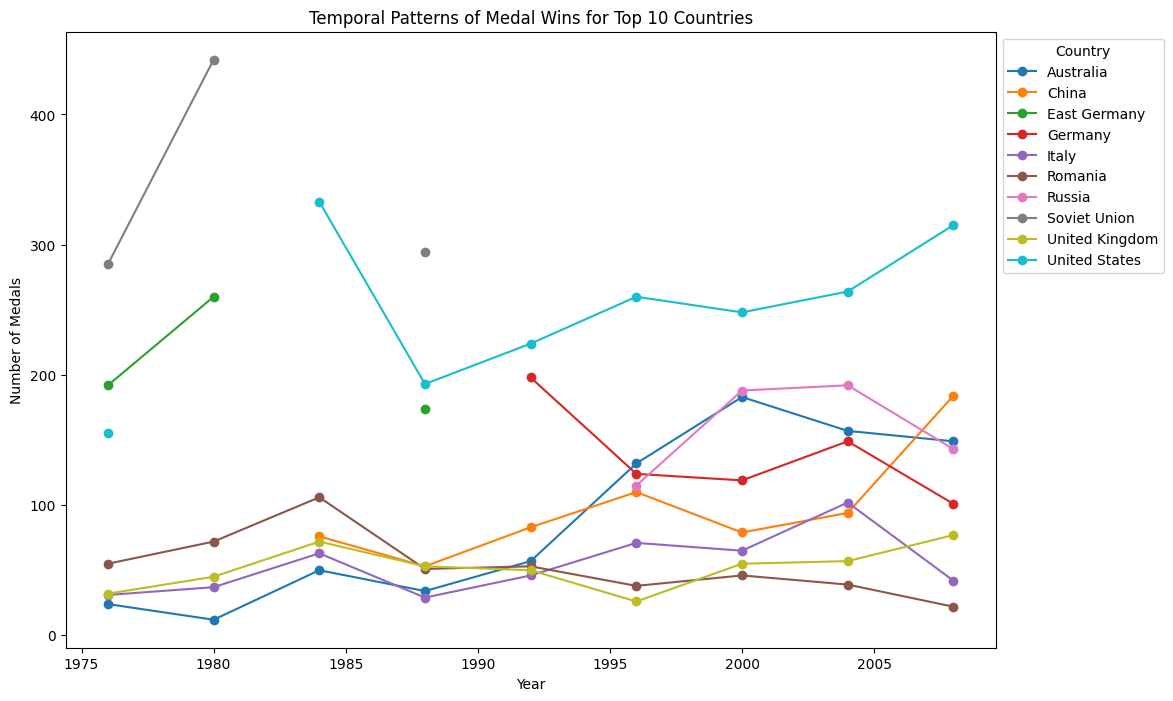

In [4]:
# Filter the DataFrame to include only the top 10 countries
top_countries = top_ten.head(10).index  
# Index(['United States', 'Soviet Union', 'Australia', 'Germany', 'China','Russia', 'East Germany', 'Italy', 'Romania', 'United Kingdom'],dtype='object', name='Country')
# Selects the columns that we want
top_filtered_df = cleaned_som_table[cleaned_som_table['Country'].isin(top_countries)]

# Group by country and year, count the number of medals
grouped_by_year = top_filtered_df.groupby(['Country', 'Year']).size().unstack()  # .unstack() make it dataframe 

# Plot the temporal patterns using a line plot
grouped_by_year.T.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Temporal Patterns of Medal Wins for Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

The pattern that I observed is that some countries cannot maintain their achievements in certain years, and the US has mostly been dominating since 1985. I haven't searched for details, but just by looking at the graph, I can infer that some countries may have lost their independence, possibly due to war or invasion, or collapsed, as seen with the Soviet Union. It had the highest number of medals in this chart, and after 1985, we cannot see any medals represented in the graph.

### Q2 Top 10 Gold Winner Countries (20 points)
* Visualize the 10 countries with the highest number of gold medals. You can choose any appropriate chart type. The chart should show the number of gold medals.
* Interpret the result.

**Your Answer:**

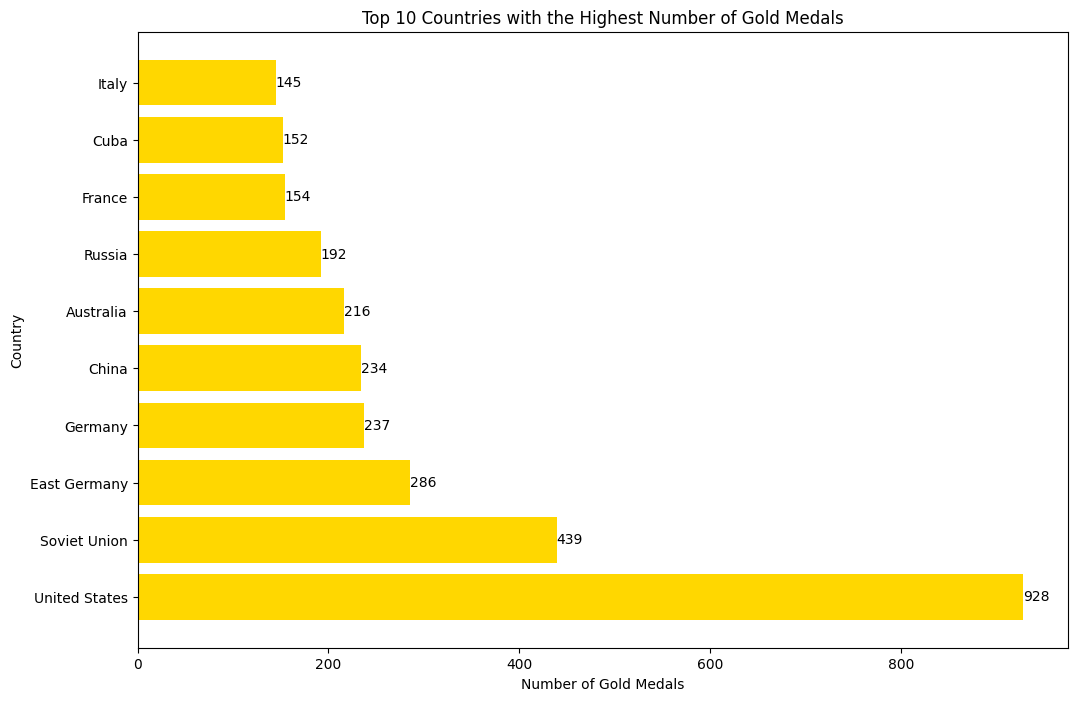

In [5]:
# Filter only gold medals
gold_df = cleaned_som_table[cleaned_som_table['Medal'] == 'Gold']

# Group by country and count the number of gold medals
gold_by_country = gold_df.groupby('Country').size().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
# To make a horizontal bar chart 
barh = plt.barh(gold_by_country.index, gold_by_country.values, color='gold')
plt.title('Top 10 Countries with the Highest Number of Gold Medals')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Country')
# adding the number of gold medals to list
for bar, value in zip(barh, gold_by_country.values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(value), va='center')
plt.show()

If I were to make a common interpretation with the above table, just as in the total medal count, the US is also leading in the number of gold medals. The top 10 countries in the 'Temporal Patterns of Medal Wins for Top 10 Countries' table are also present in the 'Top 10 Countries with the Highest Number of Gold Medals' list.

### Q3 Discipline Diversity in Successful Countries (20 points):
* Create a visualization that represents the diversity of disciplines in which the 10 countries with the most medals. Sort the countries by the total number of medals in descending order.
* Discuss any correlation between a country's success and its range of disciplines.

**Write here:**

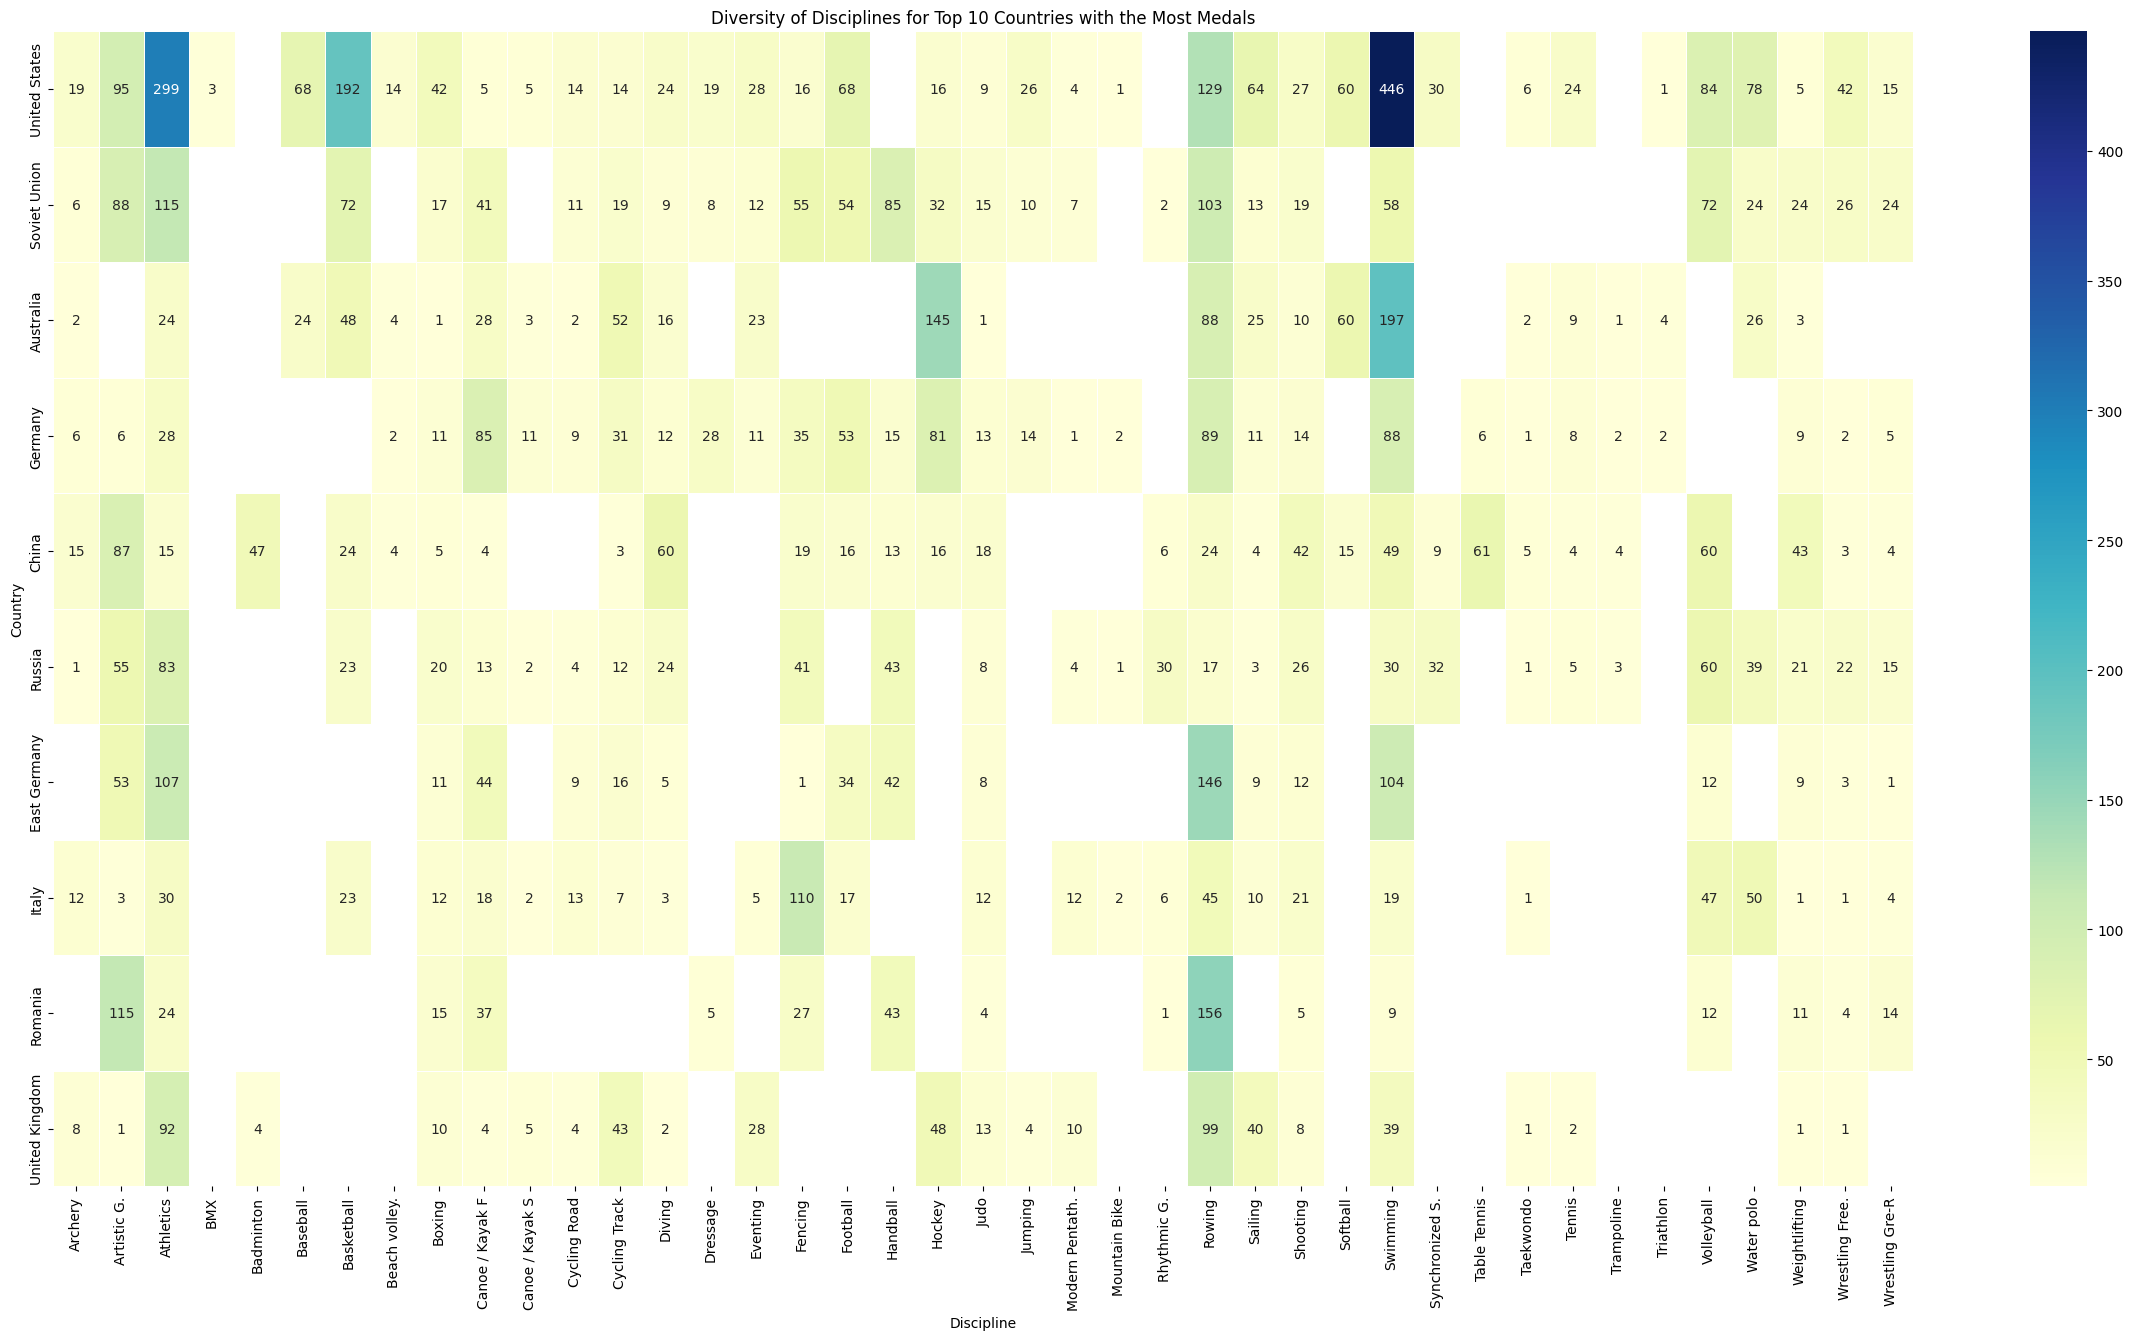

Country
United States     36
Soviet Union      28
Australia         25
Germany           32
China             30
Russia            29
East Germany      19
Italy             27
Romania           16
United Kingdom    23
dtype: int64


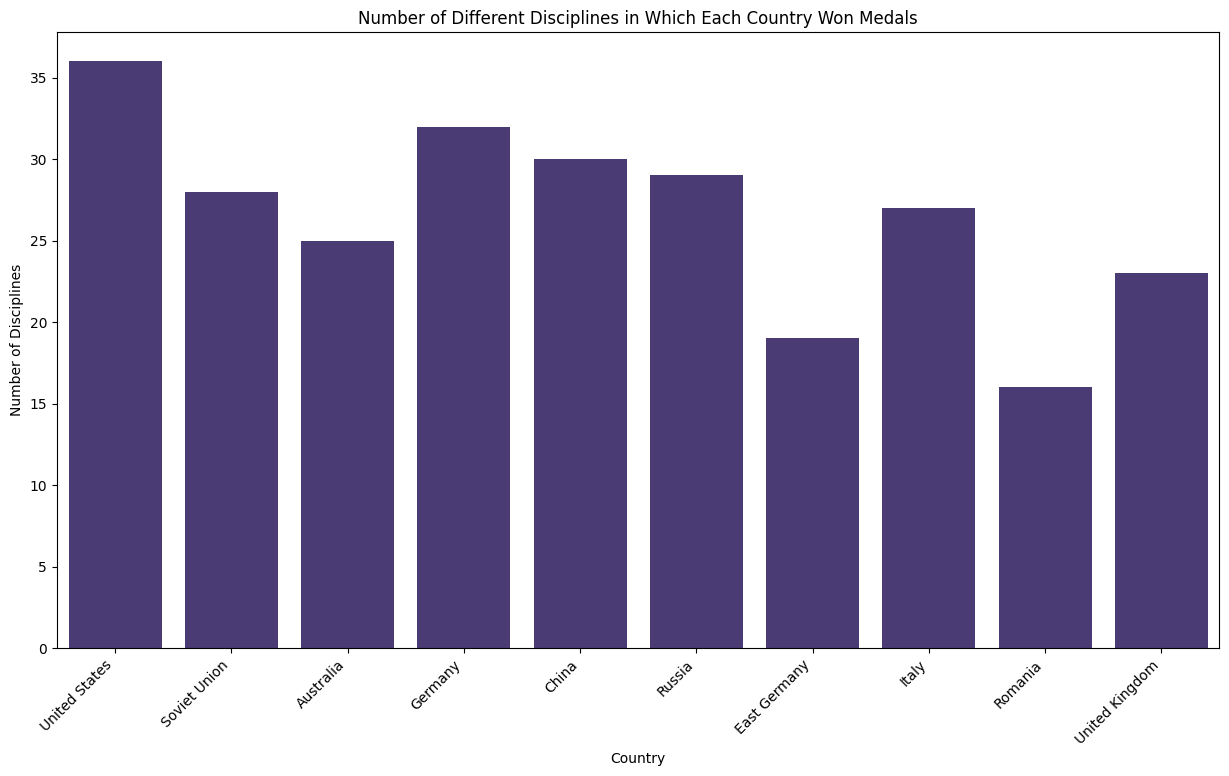

In [6]:
disciplines_by_country = top_filtered_df.groupby(['Country', 'Discipline']).size().unstack()

# Sort countries by the total number of medals in descending order
sorted_countries = disciplines_by_country.sum(axis=1).sort_values(ascending=False).index
disciplines_by_country_sorted = disciplines_by_country.loc[sorted_countries]

# Create a heatmap
plt.figure(figsize=(30, 15))  
sns.set_palette("husl", 40)   # Adjust color palette
sns.heatmap(disciplines_by_country_sorted, cmap="YlGnBu", annot=True, fmt='g', linewidths=.5)

# Customize the chart
plt.title('Diversity of Disciplines for Top 10 Countries with the Most Medals')
plt.xlabel('Discipline')
plt.ylabel('Country')

plt.show()

#### Is there a correlation?
disciplines_count_by_country = disciplines_by_country_sorted.apply(lambda x: x[x > 0].count(), axis=1)
print(disciplines_count_by_country)
plt.figure(figsize=(15, 8))
sns.set_palette("viridis")  # Renk paleti
ax = sns.barplot(x=disciplines_count_by_country.index, y=disciplines_count_by_country.values)

# Customize the chart
plt.title('Number of Different Disciplines in Which Each Country Won Medals')
plt.xlabel('Country')
plt.ylabel('Number of Disciplines')
plt.xticks(rotation=45, ha='right')
plt.show()

Actually even I don't believe this is the best representation :) but I think this is better than stacked bar chart because the disciplines couldn't distinguished in that representation. When it comes to graph I can say that there is no "exact" correlation between country's success and its range of disciplines.

### Q4 Female Gender Distribution Across Sports (20 points):
* Investigate the gender distribution (in percentage) in each sport. Choose the most suitable visualization method.
* Discuss any notable result.

**Your Answer:**

<Figure size 3000x2000 with 0 Axes>

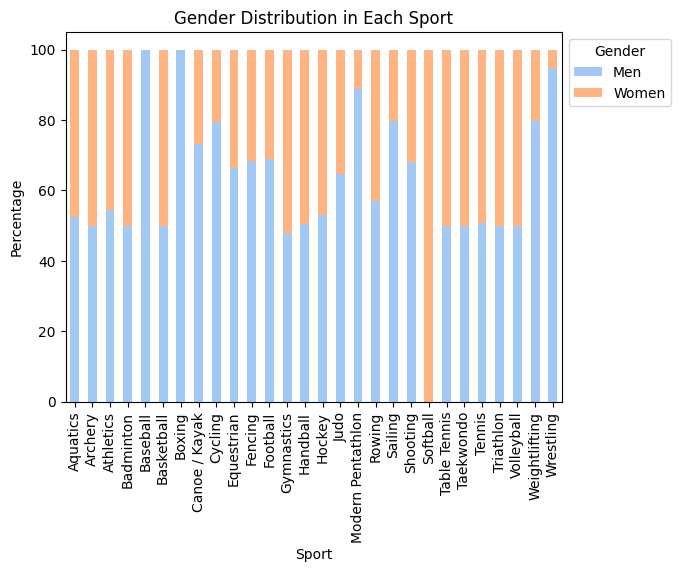

In [7]:
# Group by Sport and Gender, count the number of occurrences
gender_distribution = cleaned_som_table.groupby(['Sport', 'Gender']).size().unstack()

# Calculate the percentage distribution
gender_distribution_percentage = gender_distribution.div(gender_distribution.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
plt.figure(figsize=(30, 20))
sns.set_palette("pastel") 

gender_distribution_percentage.plot(kind='bar', stacked=True)
plt.title('Gender Distribution in Each Sport')
plt.xlabel('Sport')
plt.ylabel('Percentage')
plt.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

At first, I got confused because I was receiving fewer values compared to graph above this one, but later I realized that there were two similar categories ('Sports' and 'Discipline') in the main dataframe. If we interpret the graph, we can observe that in some sports, gender distribution is completely separated. For example, in sports like softball and badminton, gender distribution is distinct.

### Q5 Geographical Visualization (20 points)
* You should plot a map and color the countries according to the number of medals the country have. The coloring should be correlated with the number of medals. (For example: if a country has more medals than the other countries, then it should be darker than the other ones.)
* In this part, you should use [geopandas](https://geopandas.org/en/stable/index.html). If you need, you can use the below code to download the library.
* Write your comments about the visualization.

In [8]:
# !pip install geopandas
import geopandas as gpd

**Answer here:**

C:\Users\Abdulkadir\AppData\Local\Temp\ipykernel_24032\1300975110.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


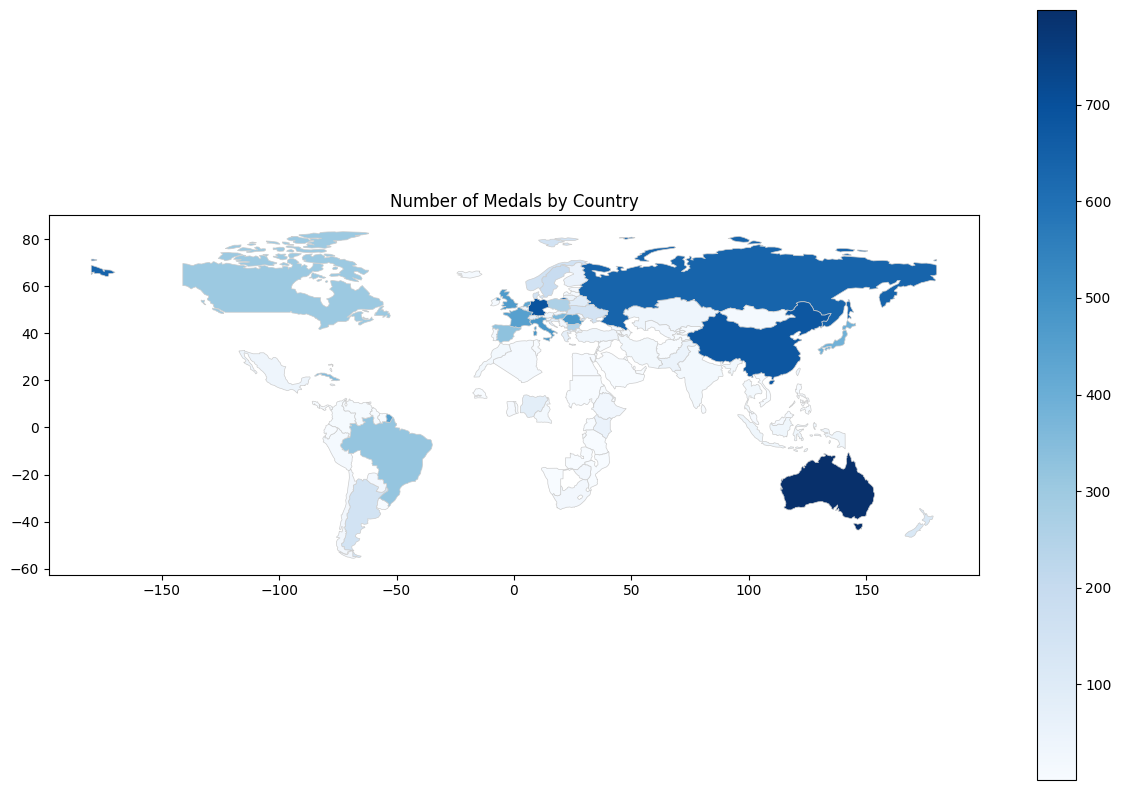

73
Unmatched Countries: {'Korea, South', 'Hong Kong*', 'Netherlands Antilles*', 'Korea, North', 'Singapore', 'East Germany', 'Virgin Islands*', 'Mauritius', 'Czech Republic', 'Puerto Rico*', 'Yugoslavia', 'Independent Olympic Participants (1992)', 'Soviet Union', 'Macedonia', 'Tonga', "Cote d'Ivoire", 'United States', 'Barbados', 'Dominican Republic', 'Czechoslovakia', 'Unified team', 'West Germany', 'Bermuda*'}


In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Merging the world map with my DataFrame based on the 'Country' column
world = world.merge(top_ten, left_on='name', right_on='Country', how='left')
# Plot the map and color countries based on the number of medals
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Medal', cmap='Blues', linewidth=0.5, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Medals by Country')
plt.show()

# filter the not given datas from the world map
not_given_countries = world[world['Medal'].isnull()]
print(len(not_given_countries['name']))

## I realised to use world.merge the name of the countries should be same and in our plot United States of America is represented as United States
# I will find which countries doesn't match with world map

# Country names in the 'World' dataframe
world_countries = set(world['name'].unique())
# Country names in the 'top_ten' dataframe
top_countries = set(top_ten.index)
# Finding unmatched countries
unmatched_countries = top_countries - world_countries
# Printing unmatched countries
print("Unmatched Countries:", unmatched_countries)





In [10]:
# Convert unmatched_countries to a list
unmatched_medals = top_ten.loc[list(unmatched_countries)]

# Print the medal counts of unmatched countries
print("Medal Counts of Unmatched Countries:\n", unmatched_medals['Medal'])

Medal Counts of Unmatched Countries:
 Country
Korea, South                                454
Hong Kong*                                    3
Netherlands Antilles*                         1
Korea, North                                 37
Singapore                                     3
East Germany                                626
Virgin Islands*                               1
Mauritius                                     1
Czech Republic                               41
Puerto Rico*                                  5
Yugoslavia                                  278
Independent Olympic Participants (1992)       3
Soviet Union                               1021
Macedonia                                     1
Tonga                                         1
Cote d'Ivoire                                 1
United States                              1992
Barbados                                      1
Dominican Republic                            4
Czechoslovakia                            

In [11]:
# For each unmatched country, make corrections
for unmatched_country in unmatched_countries:
    # Find the matching country
    matching_country = world[world['name'].str.contains(unmatched_country, case=True, regex=False, na = False)]['name'].values
    
    # If there are multiple matching countries, use the first one
    if len(matching_country) > 0:
        selected_country = matching_country[0]
    else:
        # If no matching country is found, skip the correction
        print(f"\nNo matching country found: {unmatched_country}")
        continue
    
    # Print the corrected country
    print(f"{unmatched_country} --> {selected_country}")
    
    # Update the 'top_ten' DataFrame using the corrected country
    top_ten = top_ten.rename(index={unmatched_country: selected_country})

# Print the updated 'top_ten' DataFrame
print("\nUpdated top_ten:")
print(top_ten)


No matching country found: Korea, South

No matching country found: Hong Kong*

No matching country found: Netherlands Antilles*

No matching country found: Korea, North

No matching country found: Singapore

No matching country found: East Germany

No matching country found: Virgin Islands*

No matching country found: Mauritius

No matching country found: Czech Republic

No matching country found: Puerto Rico*

No matching country found: Yugoslavia

No matching country found: Independent Olympic Participants (1992)

No matching country found: Soviet Union
Macedonia --> North Macedonia

No matching country found: Tonga

No matching country found: Cote d'Ivoire
United States --> United States of America

No matching country found: Barbados

No matching country found: Dominican Republic

No matching country found: Czechoslovakia

No matching country found: Unified team

No matching country found: West Germany

No matching country found: Bermuda*

Updated top_ten:
                       

In [12]:
# I've corrected some important countries by hand because the function doesn't change it
top_ten = top_ten.rename(index={'Soviet Union': 'Russia'})
top_ten = top_ten.rename(index={'East Germany': 'Germany'})
print(top_ten[[ 'Medal']])

                          Medal
Country                        
United States of America   1992
Russia                     1021
Australia                   798
Germany                     691
China                       679
...                         ...
Panama                        1
Senegal                       1
Sri Lanka                     1
Sudan                         1
North Macedonia               1

[127 rows x 1 columns]


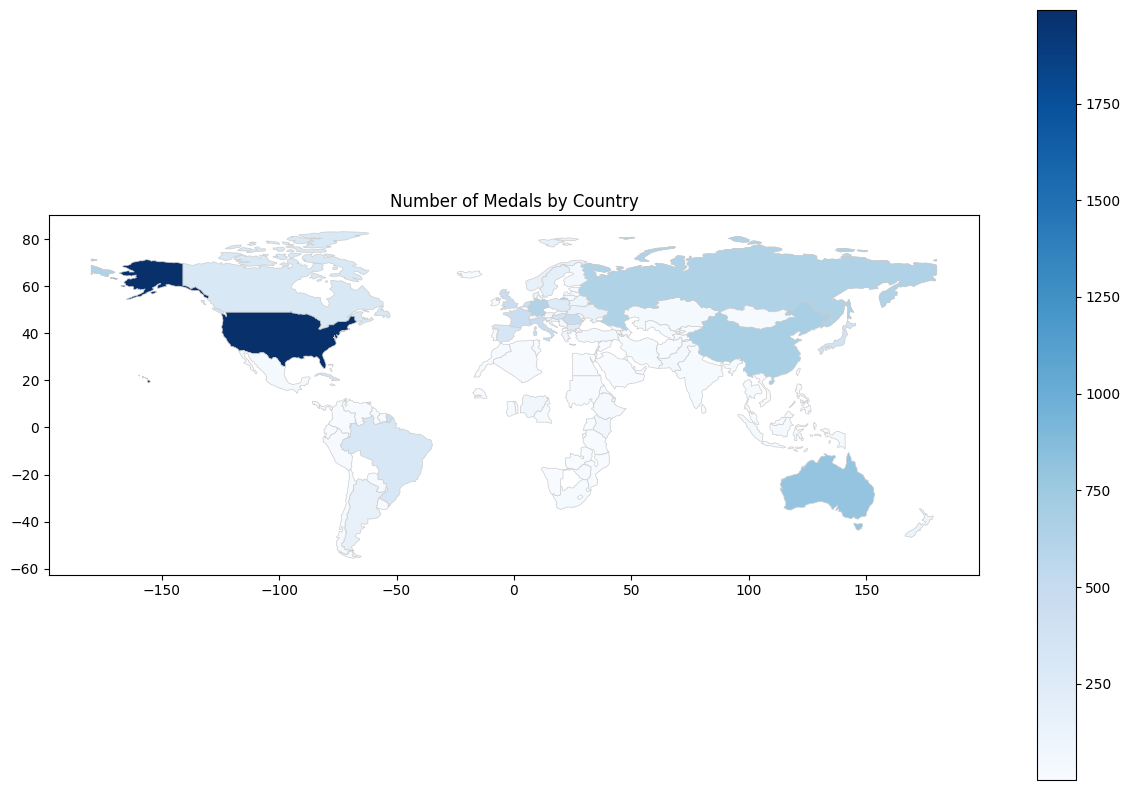

In [13]:
# Merging the world map with my DataFrame based on the 'Country' column
world = world.merge(top_ten, left_on='name', right_on=top_ten.index, how='left', suffixes=('_world', '_top_ten'))

# Plot the map and color countries based on the number of medals
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Medal_top_ten', cmap='Blues', linewidth=0.5, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Medals by Country')
plt.show()


I wrote a code to change the names of some countries because their names were different. However, it still didn't work, so I only changed the names of the countries with a large population because the populations of other countries were so small that they wouldn't matter. I hope it won't be a problem because I made an effort to do it.